In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('wc-miss11.csv')

In [8]:
df = df.drop(columns=['Unnamed: 0', 'country', 'year'])


In [96]:
y = df['results']
X = df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=10)

In [97]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
)

In [98]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

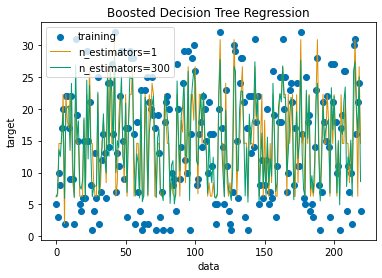

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train=np.arange(0,len(X_train),1)

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X_train, y_train, color=colors[0], label="training")
plt.plot(X_train, y_1, color=colors[1], label="n_estimators=1", linewidth=1)
plt.plot(X_train, y_2, color=colors[2], label="n_estimators=300", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [100]:
y_pred = regr_2.predict(X_test)

In [101]:
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.3997392002509619
RMSE : 6.287754378259521
MSE: 39.535855121321774
MAE: 4.719305917802166
MAPE: 0.5456310121825513


In [102]:
data = {'y_test': y_test, 'y_pred': y_pred}
new_df = pd.DataFrame(data)
diff = (new_df['y_test'] - (new_df['y_pred'])).abs()
new_df['diff'] = diff
new_df = new_df.sort_values(by='diff', ascending=True)

In [103]:
new_df

,y_test,y_pred,diff
21,9,9.000000,0.000000
80,23,22.763636,0.236364
61,12,12.261538,0.261538
198,12,11.680000,0.320000
196,18,18.489796,0.489796
25,15,14.333333,0.666667
163,12,12.793103,0.793103
195,19,18.023256,0.976744
24,10,9.000000,1.000000
268,22,23.303030,1.303030
